<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Lab: Titanic EDA

---
For this lab, we're going to take a look at the Titanic manifest. We'll be exploring this data to see what we can learn regarding the survival rates of different groups of people.

## Step 1: Reading the data

1. Read the titanic data (in the form of the `train.csv` in this repo using the appropriate Pandas method).

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
train = pd.read_csv('train.csv') 

In [106]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Data Dictionary

| Variable | Description | Details |
|----------|-------------|---------|
| survival | Survival | 0 = No; 1 = Yes |
| pclass | Passenger Class | 1 = 1st; 2 = 2nd; 3 = 3rd |
| name | First and Last Name | |
| sex | Sex | |
| age | Age | |
| sibsp | Number of Siblings/Spouses Aboard | |
| parch | Number of Parents/Children Aboard | |
| ticket | Ticket Number | |
| fare | Passenger Fare | |
| cabin | Cabin | |
| embarked | Port of Embarkation | C = Cherbourg; Q = Queenstown; S = Southampton |

## Step 2: Cleaning the data
####  1. Create a bar chart showing how many missing values are in each column

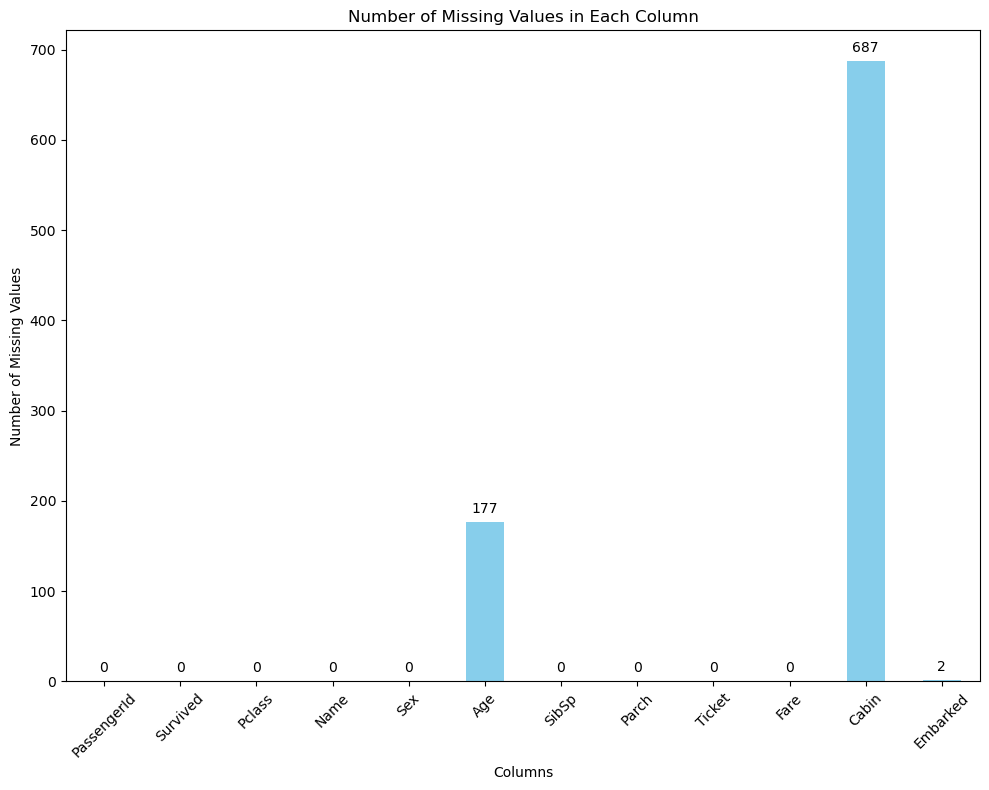

In [8]:
# Find the missing values
missing_values = train.isnull().sum() 

# Create a bar chart showing the number of missing values in each column
plt. figure(figsize = (10,8))
missing_values.plot(kind='bar', color='skyblue')

#Add label
for i, value in enumerate(missing_values):
    plt.text(i, value + 10, str(value), ha='center')


# Set chart title and labels
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


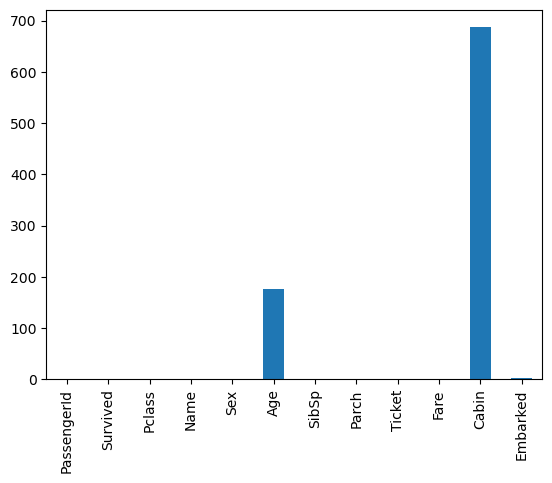

In [116]:
# Another choice
train.isnull().sum().plot(kind='bar')
plt.show()

####  2. Which column has the most `NaN` values? How many cells in that column are empty?


In [10]:
missing_values 

#The column with the most NaN values in your dataset is "Cabin," 
#with 687 missing cells.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Another way..
#train.isnull().sum().sort_values(ascending=False)

####  3. Delete all rows where `Embarked` is empty

In [12]:
train= train.dropna(subset=['Embarked'])

In [13]:
train['Embarked'].isnull().sum()

0

#### 4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

In [15]:
train['Cabin'] = train['Cabin'].fillna(r'¯\_(ツ)_/¯')

In [16]:
train['Cabin']

0      ¯\_(ツ)_/¯
1            C85
2      ¯\_(ツ)_/¯
3           C123
4      ¯\_(ツ)_/¯
         ...    
886    ¯\_(ツ)_/¯
887          B42
888    ¯\_(ツ)_/¯
889         C148
890    ¯\_(ツ)_/¯
Name: Cabin, Length: 889, dtype: object

In [ ]:
# Another way...
#train.fillna({'Cabin':r'¯\(ツ)/¯'},inplace = True) ##Add r' ... it's raw stringe, it will treat as the charecter

## Step 3: Feature extraction

#### 1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [124]:
train['FamilyCount'] = train['SibSp'] + train['Parch']
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [126]:
#Another way...check only Parch/SibSp
train[['Parch','SibSp','FamilyCount']]

,Parch,SibSp,FamilyCount
0,0,1,1
1,0,1,1
2,0,0,0
3,0,1,1
4,0,0,0
...,...,...,...
886,0,0,0
887,0,0,0
888,2,1,3
889,0,0,0


#### 2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.


In [128]:
train['IsReverend']=train['Name'].apply(lambda x:1 if 'Rev' in x else 0)

In [90]:
#train['IsReverend'] = train['Name'].str.contains('Rev.').map(lambda x: int(x)) another choice...

In [132]:
train['IsReverend'].value_counts()

IsReverend
0    885
1      6
Name: count, dtype: int64

#### 3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`.

  - Familiarize yourself with the [**`pd.get_dummies` documentation**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS (required): Extract the title from everyone's name and create dummy columns

In [ ]:
#This option 'removes' the original version of the column
#train = pd.get_dummies(train, columns = ['Embarked'])

In [23]:
# Create dummy variables for 'Embarked'
embarked_dummies = pd.get_dummies(train['Embarked'], prefix='Embarked', drop_first=False)

# Join the new dummy columns to the original DataFrame
train = train.join(embarked_dummies)

# Display the DataFrame with new columns
print(train[['Embarked', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].head())

  Embarked  Embarked_C  Embarked_Q  Embarked_S
0        S       False       False        True
1        C        True       False       False
2        S       False       False        True
3        S       False       False        True
4        S       False       False        True


In [92]:
# James suggestion
#train['Sex'].map(lambda x: 1 if x == 'male' else 0)

In [ ]:
# train = pd_dummies (train, columns = ['Sex'])

In [24]:
# Create dummy variables for 'Sex'
sex_dummies = pd.get_dummies(train['Sex'], prefix='Sex', drop_first=False)

# Join the new dummy columns to the original DataFrame
train = train.join(sex_dummies)

# Display the DataFrame with new columns
print(train[['Sex', 'Sex_male', 'Sex_female']].head())

      Sex  Sex_male  Sex_female
0    male      True       False
1  female     False        True
2  female     False        True
3  female     False        True
4    male      True       False


In [25]:
# Extract titles from the 'Name' column
train['Title'] = train['Name'].str.extract(r'\s*([A-Za-z]+)\.', expand=False)

# Create dummy variables for 'Title'
title_dummies = pd.get_dummies(train['Title'], prefix='Title', drop_first=False)

# Join the new dummy columns to the original DataFrame
train = train.join(title_dummies)

# Display the DataFrame with new title columns
print(train[['Title'] + list(title_dummies.columns)].head())

  Title  Title_Capt  Title_Col  Title_Countess  Title_Don  Title_Dr  \
0    Mr       False      False           False      False     False   
1   Mrs       False      False           False      False     False   
2  Miss       False      False           False      False     False   
3   Mrs       False      False           False      False     False   
4    Mr       False      False           False      False     False   

   Title_Jonkheer  Title_Lady  Title_Major  Title_Master  Title_Miss  \
0           False       False        False         False       False   
1           False       False        False         False       False   
2           False       False        False         False        True   
3           False       False        False         False       False   
4           False       False        False         False       False   

   Title_Mlle  Title_Mme  Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  
0       False      False      True      False     False     

In [ ]:
# Another way...much more shorter
#train['Title'] = [each.split(',')[1].split('.')[0].strip() for each in train['Name']]
#train.unique()

## Step 4: Exploratory analysis

_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

#### 1. What was the survival rate overall?


In [29]:
survival_rate = train['Survived'].mean()
survival_rate

0.38245219347581555

#### 2. Which gender fared the worst? What was their survival rate?

In [31]:
# Calculate the survival rate by gender
gender_survival_rate = train.groupby('Sex')['Survived'].mean()

# Identify which gender fared the worst
worst_gender = gender_survival_rate.idxmin()
worst_survival_rate = gender_survival_rate.min()

print(f'Gender that fared the worst: {worst_gender}')
print(f'Survival rate for {worst_gender}: {worst_survival_rate:.2%}')


Gender that fared the worst: male
Survival rate for male: 18.89%


#### 3. What was the survival rate for each `Pclass`?

In [33]:
# Calculate the survival rate by passenger class (Pclass)
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean()
pclass_survival_rate


Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### 4. Did any reverends survive? How many?`

In [35]:
reverends_survived = train[(train['IsReverend'] == '1') & (train['Survived'] == 1)].shape[0]
print(f'Number of reverends who survived: {reverends_survived}')

Number of reverends who survived: 0


#### 5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [38]:
cabin_survival_rate = train[train['Cabin'] == r'¯\_(ツ)_/¯']['Survived'].mean()
print(f'Survival rate for cabins marked ¯\\_(ツ)_/¯: {cabin_survival_rate:.2%}')

Survival rate for cabins marked ¯\_(ツ)_/¯: 29.99%


In [37]:
train['Cabin']

0      ¯\_(ツ)_/¯
1            C85
2      ¯\_(ツ)_/¯
3           C123
4      ¯\_(ツ)_/¯
         ...    
886    ¯\_(ツ)_/¯
887          B42
888    ¯\_(ツ)_/¯
889         C148
890    ¯\_(ツ)_/¯
Name: Cabin, Length: 889, dtype: object

#### 6. What is the survival rate for people whose `Age` is empty?

In [40]:
age_nan_survival_rate = train[train['Age'].isna()]['Survived'].mean()
age_nan_survival_rate

0.2937853107344633

####  7. What is the survival rate for each port of embarkation?

In [42]:
survival_rate_by_port = train.groupby('Embarked')['Survived'].mean()
print(survival_rate_by_port)

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


#### 8. What is the survival rate for children (under 12) in each `Pclass`?

In [ ]:
# train[train['Age'] < 12].groupby('Pclass')['Survived'].mean() ##No need to add new variable as we don't use that much

In [44]:
# Filter for children (under 12)
children = train[train['Age'] < 12]

survival_rate_children_by_pclass = children.groupby('Pclass')['Survived'].mean()
print(survival_rate_children_by_pclass)

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64


####  9. Did the captain of the ship survive? Is he on the list?

In [46]:
# Check if the captain is on the list
if train['Title_Capt'].any():
    # Get the survival status of the captain
    captain_survival = train[train['Title_Capt'] == 1]['Survived'].values[0]

    print(f'The captain is on the list and {"he survived" if captain_survival == 1 else "he died"}')
else:
    print('The captain is not on the list.')

The captain is on the list and he died


#### 10. Of all the people that died, who had the most expensive ticket? How much did it cost?

In [147]:
train[train['Survived'] ==0].sort_values(by='Fare', ascending = False).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0


In [149]:
# Another way
#top_fare = train[train['Survived'] ==0] ['Fare'].max ()
#train[(train['Survived']==0) & (train['Fare']==top_fare)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0


#### 11. Does having family on the boat help or hurt your chances of survival?

In [50]:
# Calculate survival rates based on FamilyCount
family_survival_rate = train.groupby('FamilyCount')['Survived'].mean()

# Display the survival rates
print(family_survival_rate)

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64


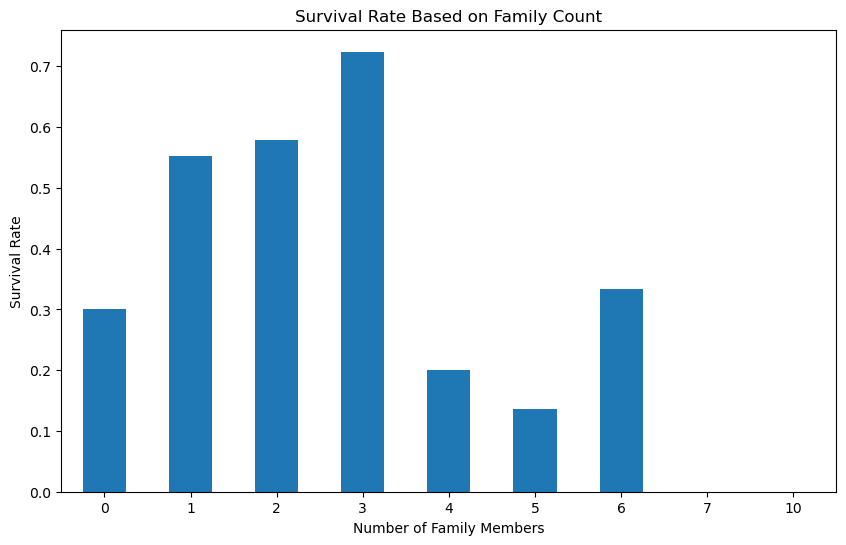

In [51]:
# Plotting the survival rates
family_survival_rate.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate Based on Family Count')
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


## Step 5: Plotting
Using Matplotlib and Seaborn, create multiple charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


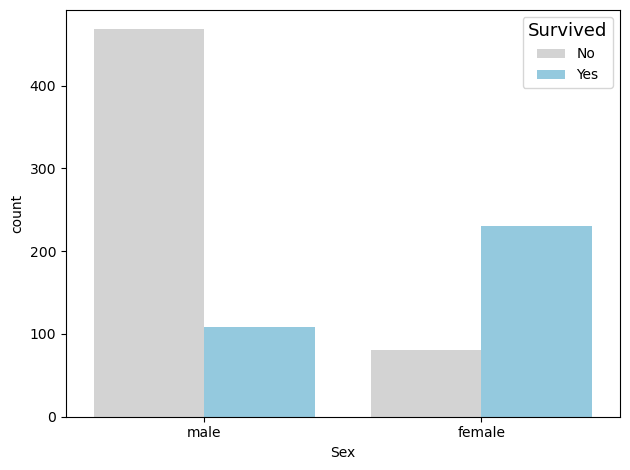

In [53]:
#Is sex important for surviving?
# Set the custom colors
palette = {0: 'lightgray', 1: 'skyblue'}

sns.countplot(x="Sex", hue="Survived", data=train,palette=palette)
plt.legend(title='Survived', title_fontsize='13', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

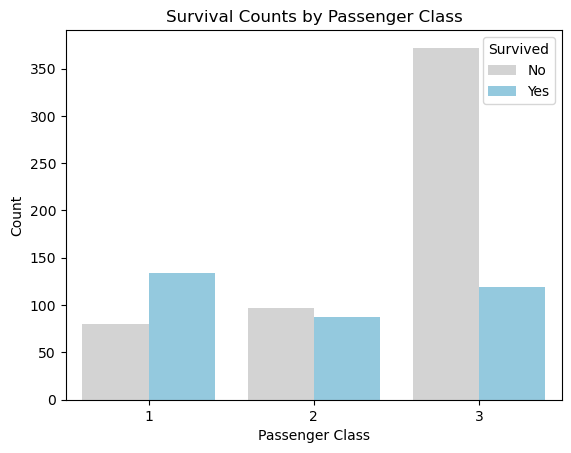

In [54]:
#Do Passenger Class help to suvive?

# Create a countplot for 'Pclass' and 'Survived'
sns.countplot(x='Pclass', hue='Survived', data=train, palette=palette)

# Add labels and title
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

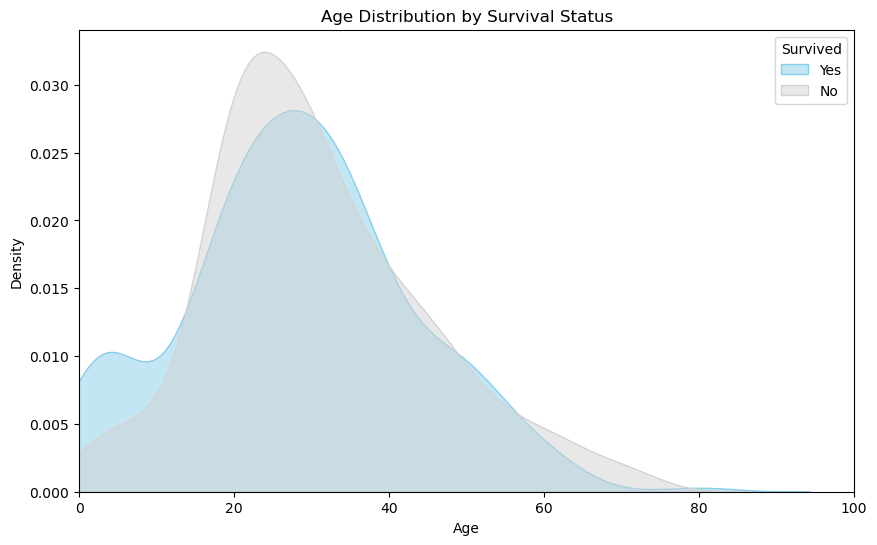

In [55]:
# Plot for age distribution by survival
plt.figure(figsize=(10, 6))
sns.kdeplot(data=train, x='Age', hue='Survived', fill=True, common_norm=False, palette={0: 'lightgray', 1: 'skyblue'}, alpha=0.5)

# Add labels and title
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Yes', 'No'])
plt.xlim(0, 100)  # Limit x-axis for better visualization
plt.show()

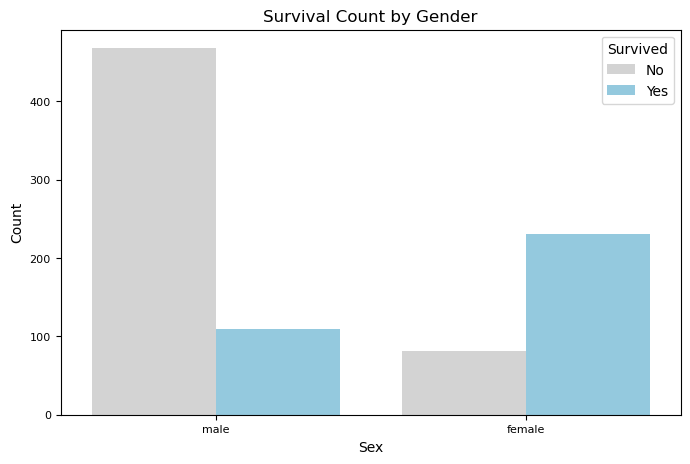

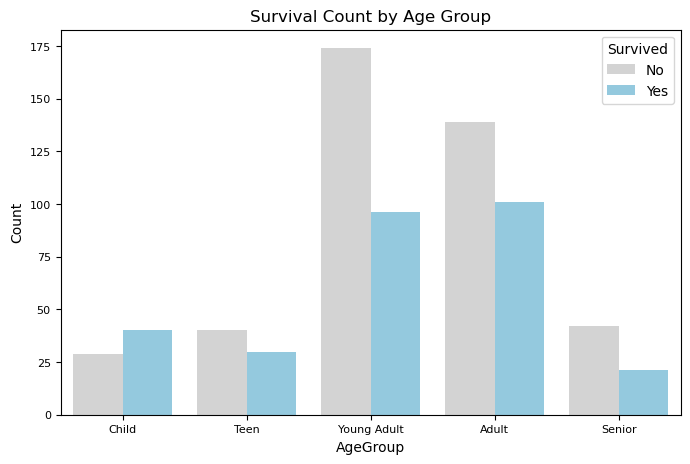

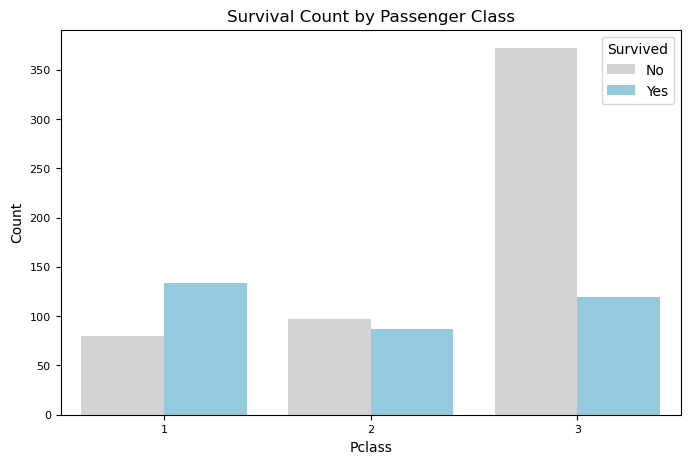

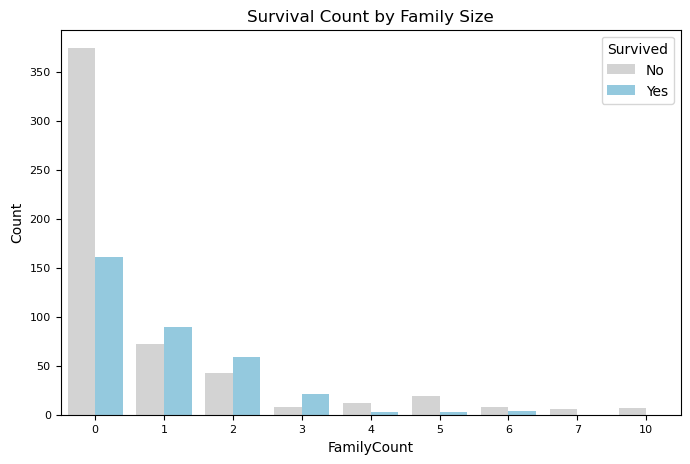

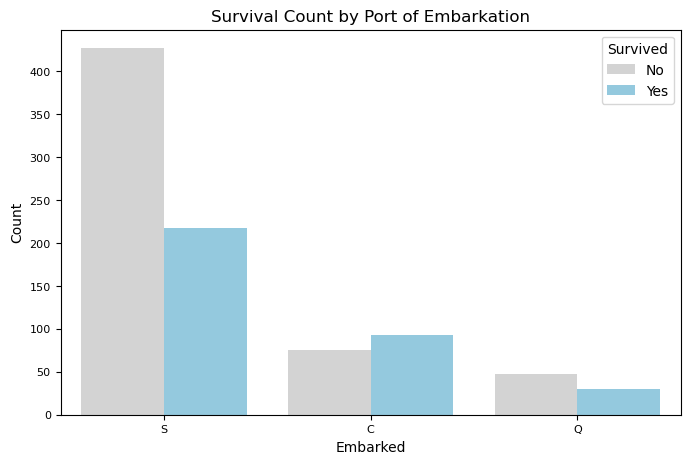

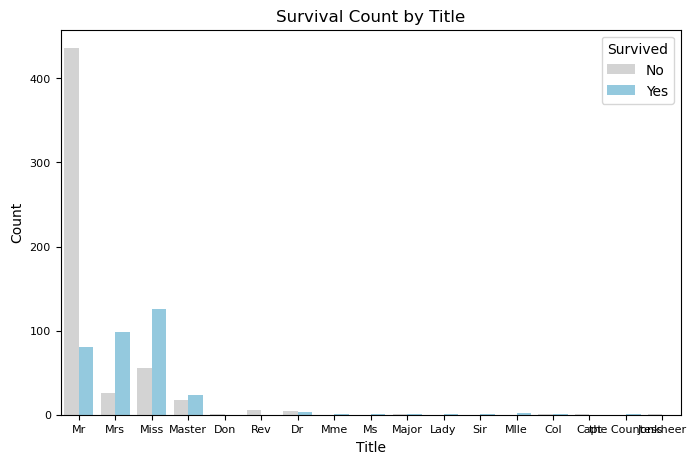

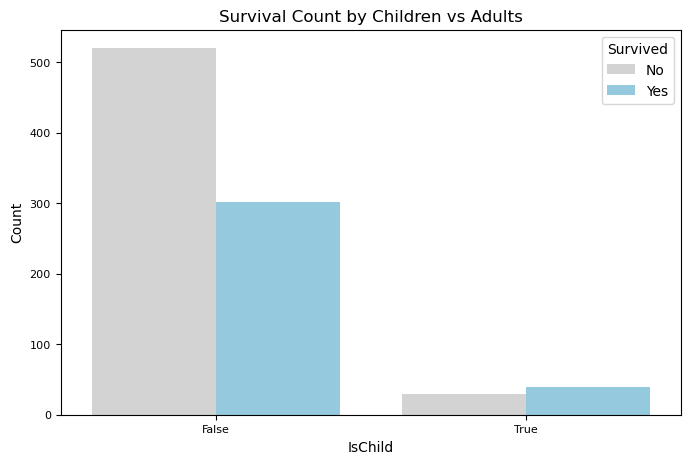

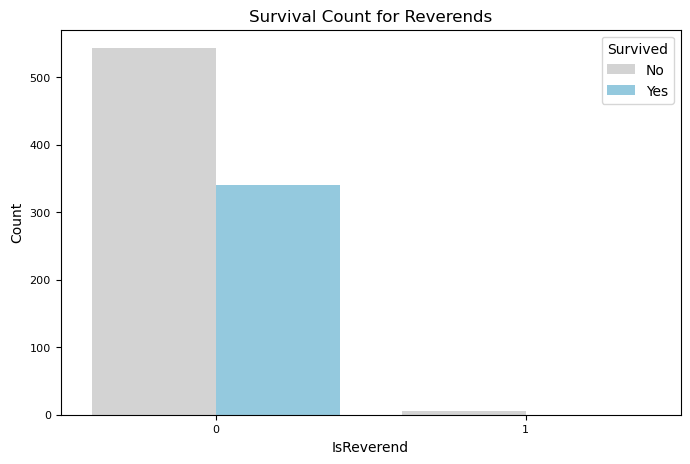

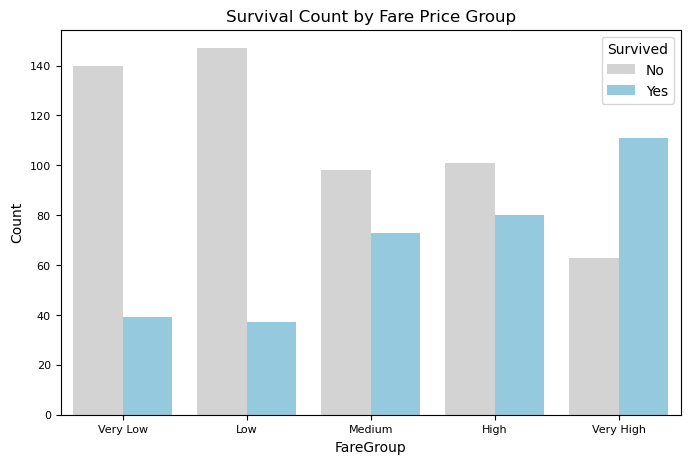

In [56]:

# Function to create a count plot with survival rates
def survival_count_plot(x, hue, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=x, hue=hue, data=train, palette={0: 'lightgray', 1: 'skyblue'})
    plt.title(title, fontsize=12)
    plt.xlabel(x, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.legend(title='Survived', title_fontsize='10', labels=['No', 'Yes'])
    plt.show()

# 1. Survival Rate by Gender
survival_count_plot('Sex', 'Survived', 'Survival Count by Gender')

# 2. Survival Rate by Age Group
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 30, 50, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
survival_count_plot('AgeGroup', 'Survived', 'Survival Count by Age Group')

# 3. Survival Rate by Passenger Class (Pclass)
survival_count_plot('Pclass', 'Survived', 'Survival Count by Passenger Class')

# 4. Survival Rate by Family Size
train['FamilyCount'] = train['SibSp'] + train['Parch']  # Assuming these columns exist
survival_count_plot('FamilyCount', 'Survived', 'Survival Count by Family Size')

# 5. Survival Rate by Port of Embarkation (Embarked)
survival_count_plot('Embarked', 'Survived', 'Survival Count by Port of Embarkation')

# 6. Survival Rate by Title (Extracted from Name)
train['Title'] = [each.split(',')[1].split('.')[0].strip() for each in train['Name']]
survival_count_plot('Title', 'Survived', 'Survival Count by Title')

# 7. Survival Rate for Children (under 12) vs Adults
train['IsChild'] = train['Age'] < 12
survival_count_plot('IsChild', 'Survived', 'Survival Count by Children vs Adults')

# 8. Survival Rate for Rev. Titles
train['IsReverend'] = train['Title'].apply(lambda x: 1 if 'Rev' in x else 0)
survival_count_plot('IsReverend', 'Survived', 'Survival Count for Reverends')

# 9. Survival Rate by Fare Price (using bins)
train['FareGroup'] = pd.qcut(train['Fare'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
survival_count_plot('FareGroup', 'Survived', 'Survival Count by Fare Price Group')
